<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica24_263150_RegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Jarquín, Álvaro
*   Matrícula: 263150

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [82]:
# Importa las bibliotecas necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carga el archivo advertising.csv.
advertising = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Muestra las primeras filas del dataframe.
print("="*43)
print("Primeras filas del dataframe")
print("="*43)
print(advertising.head())

# Describe estadísticamente las variables.
print("="*43)
print("Descripción estadística de las variables")
print("="*43)
print(advertising.describe())

Primeras filas del dataframe
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Descripción estadística de las variables
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Realiza gráficos de dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y la variable dependiente `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables. ¿Qué relación observas entre cada predictor y las ventas?
* Entre Tv y Sales hay una relación lineal positiva fuerte, entre más se invierta en TV más ventas habrán
* Su relación es moderada, hay más dispersión que en TV.
* Newspaper y Sales casi no tiene relación, los puntos están muy dispersos.

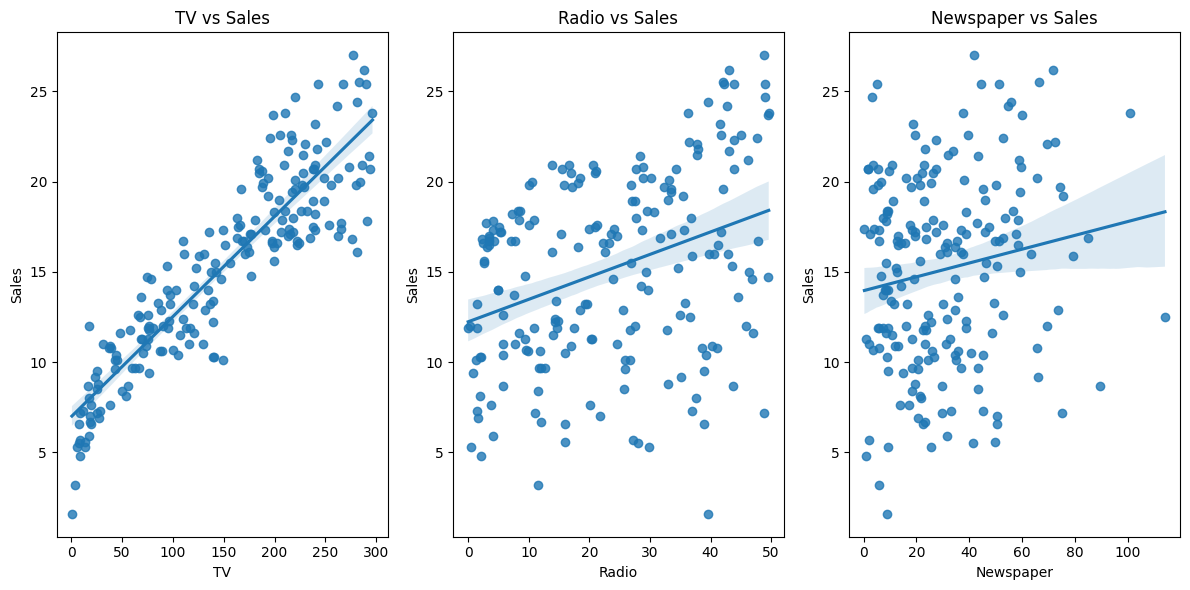

In [84]:
# Realiza gráficos de dispersión entre cada variable independiente (TV, Radio, Newspaper) y la variable dependiente Sales. Usa también regplot.
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=advertising)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=advertising)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=advertising)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde:
* ¿Qué variables están más correlacionadas con `Sales`? La variable que más se relaciona es TV, de 0.9; de ahí Radio, de 0.35 y la que menos correlación tiene es Newspaper, de 0.16.
* ¿Hay correlación alta entre predictores? No, entre TV y Radio es 0.055, entre TV y Newspaper es 0.057 y entre Radio y Newspaper es de 0.35. Esto es bueno porque evita multicolinealidad.

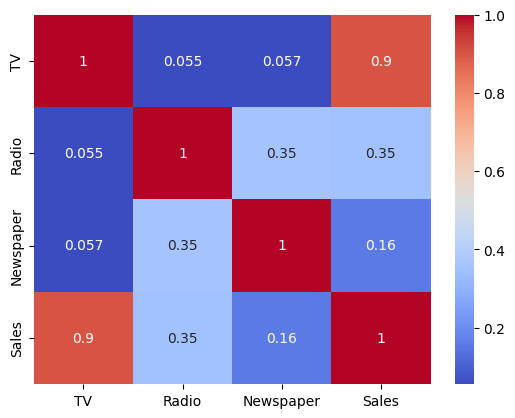

In [85]:
# Calcula la matriz de correlación y heatmap
correlacion = advertising.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el **VIF (Variance Inflation Factor)** para cada predictor (variable independiente).
2. Crea un diagrama de barras  para mostrar el **VIF**
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un **VIF mayor a 5 o mayor a 10**? No, todas las variables son menores que 5: 2.48, 3.28 y 3.05.
- ¿Qué implicaciones tiene esto para el modelo? Es una buena señal, porque no tiene multicolinealidad.

    Variable       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


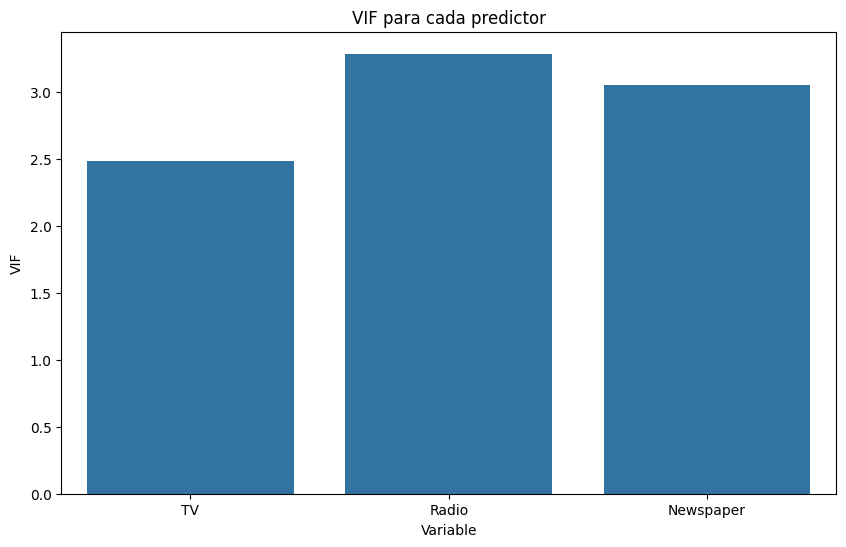

In [86]:
# Calcula el VIF (Variance Inflation Factor) para cada predictor (variable independiente).
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Variable'] = advertising.columns[:-1]
vif['VIF'] = [variance_inflation_factor(advertising.values[:, :-1], i) for i in range(advertising.shape[1] - 1)]
print(vif)

# Crea un diagrama de barras  para mostrar el VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='VIF', data=vif)
plt.title('VIF para cada predictor')
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
* ¿Qué significa cada uno de los coeficientes  en términos de ventas?
* El intercepto de 4.6251 indica que si no se invierte en publicidad las ventas serán de aproximadamente 4.62.
* Los coeficientes de TV (0.054446), Radio (0.107001) y Newspaper (0.000336), indican que por cada $1,000 que se inviertan en cada rubro aumentará en esa cantidad de veces los productos. La Radio es la que más efecto tiene en las ventas.

In [87]:
# Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
import statsmodels.api as sm
X = advertising.drop('Sales', axis=1)
y = advertising['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Imprime el intercepto y los coeficientes del modelo.
print("Intercepto:", model.params.iloc[0])
print("Coeficientes:\n", model.params[1:])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        16:42:38   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente? No completamente, pero sí se centran en el 0, la figura muestra una distribución casi normal.

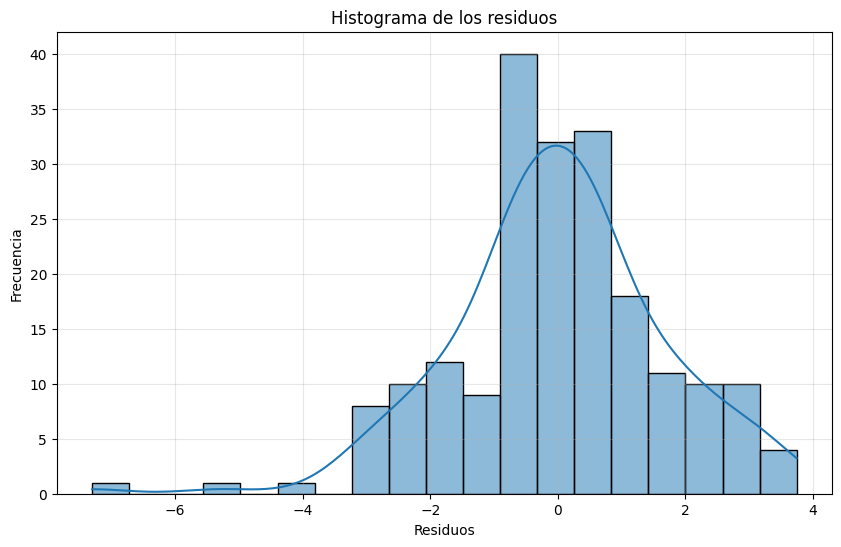

In [88]:
# Calcula los residuos: residuos = y - y_pred.
y_pred = model.predict(X)
residuos = y - y_pred

# Grafica un histograma con KDE de los residuos.
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente? Los residuos se dispersan aleatoriamente, no se observa una forma clara y pero se distribuyen alrededor del cero. No hay patrones aunque la nube de puntos está concentrada relativamente.

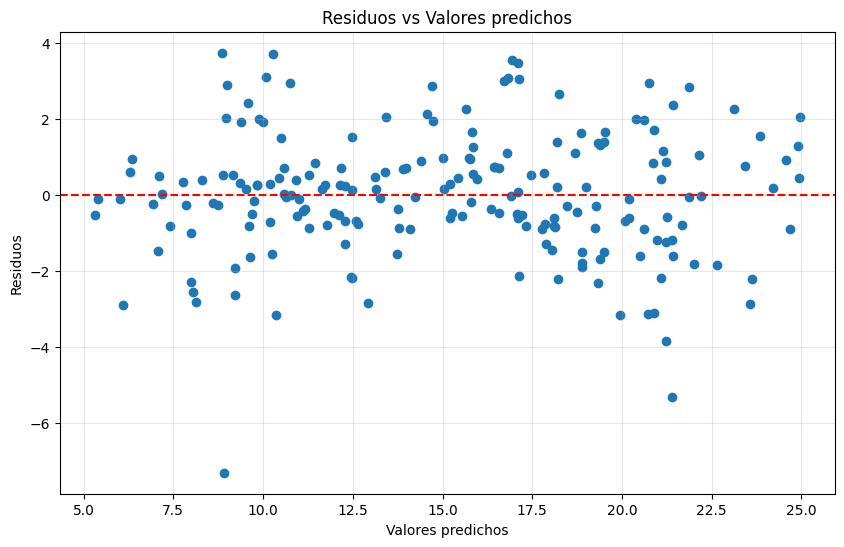

In [89]:
# Grafica los residuos contra los valores predichos.
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores predichos')
plt.grid(True, alpha=0.3)
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:
* Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal. Sí tienen una distribución razonablemente normal
* Desviaciones sistemáticas indican **asimetría** o **colas pesadas**. No hay desviaciones sistemáticas, solo unos pequeños outliers en los extremos, pero la superficie en la que coinciden es larga, por lo que el modelo es válido.

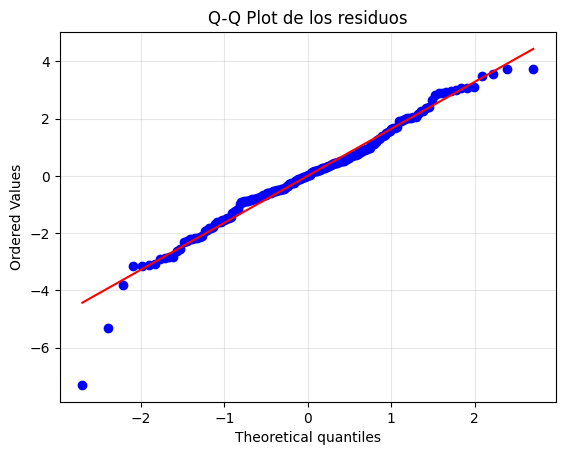

In [90]:
# Graficar el Q-Q Plot
import scipy.stats as stats
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.grid(True, alpha=0.3)
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas:
* MSE (error cuadrático medio)
* RMSE (raíz del error cuadrático medio)
* R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
MSE: 2.706006147627315, nos indica que el modelo es razonablemente bueno, entre más pequeño sea, mayor calidad.
RMSE: 1.6449942697855562, es un error aceptable para tomar decisiones.
R²: 0.9025912899684558. El modelo explica el 90.25 % de la variabilidad de las ventas, así que es muy bueno.



In [91]:
# MSE (error cuadrático medio)
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

# RMSE (raíz del error cuadrático medio)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# R² (coeficiente de determinación)
r2 = r2_score(y, y_pred)
print("R²:", r2)

MSE: 2.706006147627315
RMSE: 1.6449942697855562
R²: 0.9025912899684558


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.
2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3. ¿Qué observas? ¿Qué información puedes obtener de esta gráfica? Que tiene una distribución homogénea, con un patrón alrededor de la línea, así que tiene muy buen ajuste

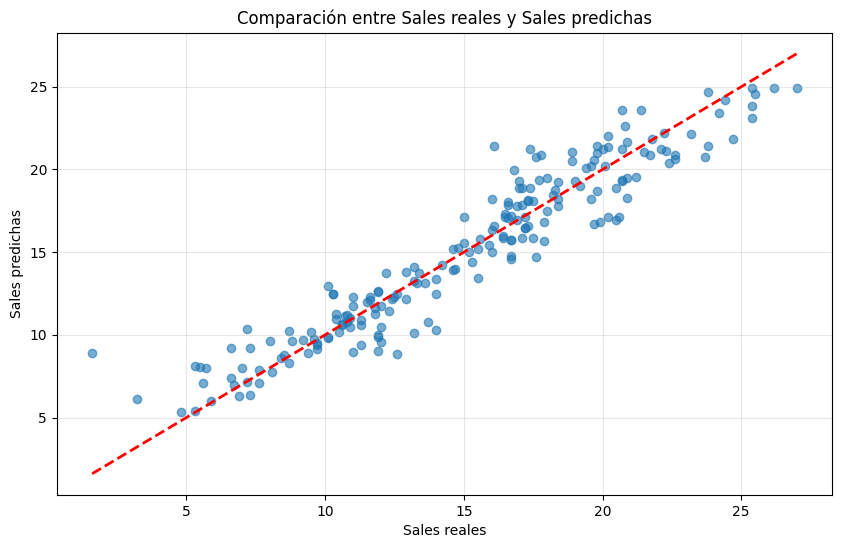

In [92]:
# 1. Crea un gráfico comparando Sales reales vs Sales predichas.
# 2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Sales reales')
plt.ylabel('Sales predichas')
plt.title('Comparación entre Sales reales y Sales predichas')
plt.grid(True, alpha=0.3)
plt.show()



### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05? TV y Radio

 - ¿Cuál es la conclusión sobre esas variables? Que tienen un efecto estadístico muy significativo

In [93]:
# Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
import statsmodels.api as sm
X = advertising.drop('Sales', axis=1)
y = advertising['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        16:43:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.
<br>
No se detectó multicolinealidad ya que los valores de VIF son menores que 5:
* TV  2.486772
* Radio  3.285462
* Newspaper  3.055245

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [94]:
# En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica
advertising_ex6 = advertising.drop('Newspaper', axis=1)

### 6.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
* ¿Qué significa cada uno de los coeficientes  en términos de ventas?
* El intercepto de 4.6308 indica que si no se invierte en publicidad las ventas serán de aproximadamente 4.63
* Los coeficientes de TV (0.05449) y Radio (0.107175) indican que por cada $1,000 que se inviertan en cada rubro aumentará en esa cantidad de veces los productos. La Radio es la que más efecto tiene en las ventas.

In [96]:
# Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
import statsmodels.api as sm
X_ex6 = advertising_ex6.drop('Sales', axis=1)
y_ex6 = advertising_ex6['Sales']
X_ex6 = sm.add_constant(X_ex6)
model_ex6 = sm.OLS(y_ex6, X_ex6).fit()
print(model_ex6.summary())

# Imprime el intercepto y los coeficientes del modelo.
print("Intercepto:", model_ex6.params.iloc[0])
print("Coeficientes:\n", model_ex6.params[1:])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        16:43:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

### 6.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente? No completamente, pero sí se centran en el 0, la figura muestra una distribución casi normal.

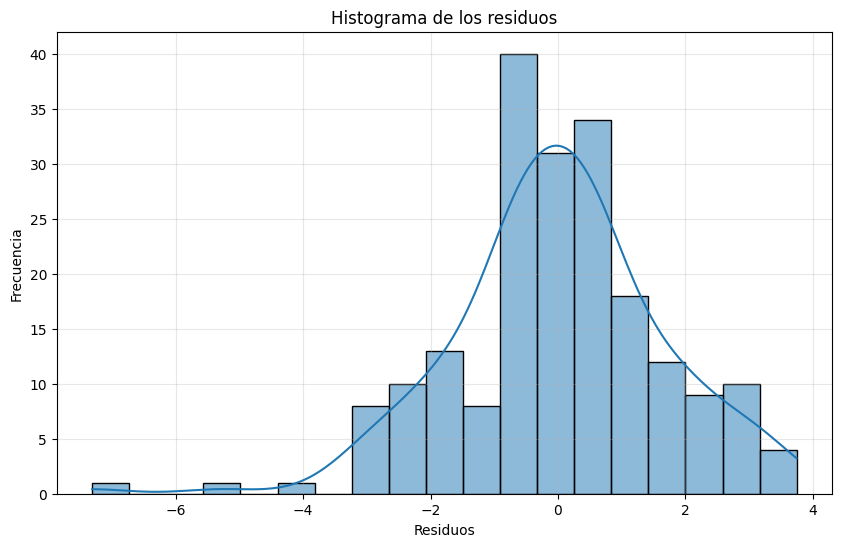

In [97]:
# Calcula los residuos: residuos = y - y_pred.
y_pred_ex6 = model_ex6.predict(X_ex6)
residuos_ex6 = y_ex6 - y_pred_ex6

# Grafica un histograma con KDE de los residuos.
plt.figure(figsize=(10, 6))
sns.histplot(residuos_ex6, kde=True)
plt.title('Histograma de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

### 6.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente? Los residuos se dispersan aleatoriamente, no se observa una forma clara y se distribuyen alrededor del cero. No hay patrones aunque la nube de puntos está concentrada relativamente.

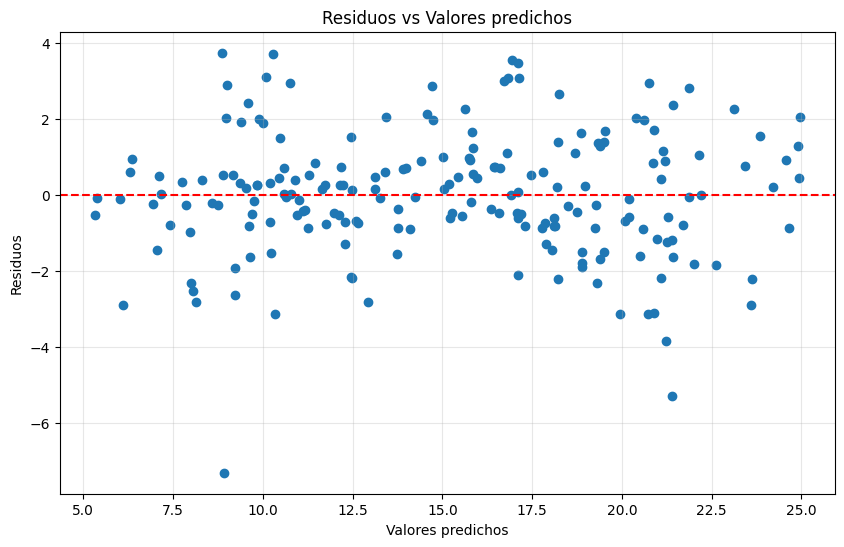

In [98]:
# Grafica los residuos contra los valores predichos.
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ex6, residuos_ex6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores predichos')
plt.grid(True, alpha=0.3)
plt.show()

### 6.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:
* Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal. Sí tienen una distribución razonablemente normal
* Desviaciones sistemáticas indican **asimetría** o **colas pesadas**. No hay desviaciones sistemáticas, solo unos pequeños outliers en los extremos, pero la superficie en la que coinciden es larga, por lo que el modelo es válido.

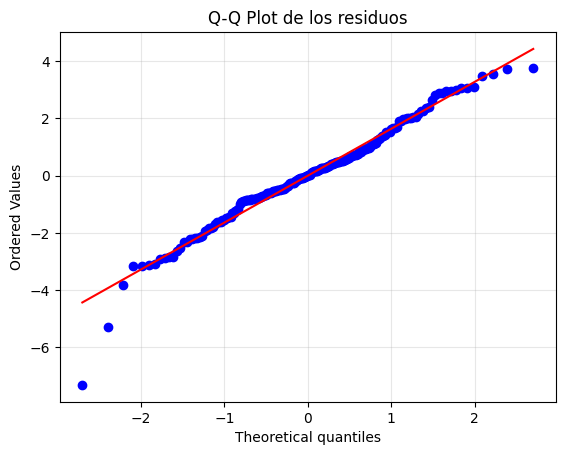

In [99]:
# Graficar el Q-Q Plot
import scipy.stats as stats
stats.probplot(residuos_ex6, dist='norm', plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.grid(True, alpha=0.3)
plt.show()

### 6.5. Evaluación del Modelo

1. Calcula las métricas:
* MSE (error cuadrático medio)
* RMSE (raíz del error cuadrático medio)
* R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
MSE: 2.7060525778834883, nos indica que el modelo es razonablemente bueno, entre más pequeño sea, mayor calidad.
RMSE: 1.6450083823140502, es un error aceptable para tomar decisiones.
R²: 0.9025896186081139. El modelo explica el 90.25 % de la variabilidad de las ventas, así que es muy bueno.

In [100]:
# MSE (error cuadrático medio)
mse_ex6 = mean_squared_error(y_ex6, y_pred_ex6)
print("MSE:", mse_ex6)

# RMSE (raíz del error cuadrático medio)
rmse_ex6 = np.sqrt(mse_ex6)
print("RMSE:", rmse_ex6)

# R² (coeficiente de determinación)
r2_ex6 = r2_score(y_ex6, y_pred_ex6)
print("R²:", r2_ex6)

MSE: 2.7060525778834883
RMSE: 1.6450083823140502
R²: 0.9025896186081139


### 6.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.
2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3. ¿Qué observas? ¿Qué información puedes obtener de esta gráfica? Que tiene una distribución homogénea, con un patrón alrededor de la línea, así que tiene muy buen ajuste

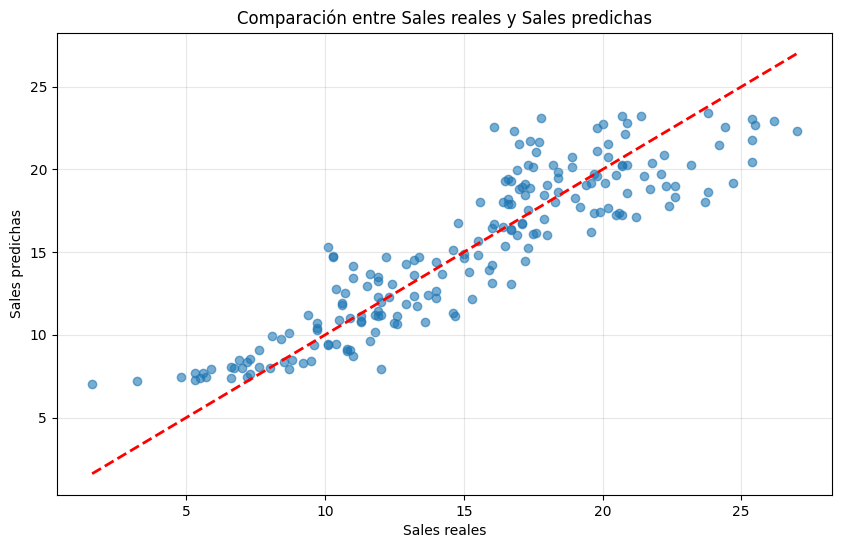

In [ ]:
# 1. Crea un gráfico comparando Sales reales vs Sales predichas.
# 2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
plt.figure(figsize=(10, 6))
plt.scatter(y_ex6, y_pred_ex6, alpha=0.6)
plt.plot([y_ex6.min(), y_ex6.max()], [y_ex6.min(), y_ex6.max()], 'r--', linewidth=2)
plt.xlabel('Sales reales')
plt.ylabel('Sales predichas')
plt.title('Comparación entre Sales reales y Sales predichas')
plt.grid(True, alpha=0.3)
plt.show()

### 6.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05? TV y Radio

 - ¿Cuál es la conclusión sobre esas variables? Que tienen un efecto estadístico muy significativo

In [104]:
# Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
import statsmodels.api as sm
X_ex6 = advertising_ex6.drop('Sales', axis=1)
y_ex6 = advertising_ex6['Sales']
X_ex6 = sm.add_constant(X_ex6)
model_ex6 = sm.OLS(y_ex6, X_ex6).fit()
print(model_ex6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        16:46:55   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

##7. Conclusiones.

* ¿Cuál de los tres modelos construidos fue el mejor?
Solo se realizaron 2 porque no había elementos para justificar realizar el segundo ya que no existía multicolinealidad. El mejor fue el del ejercicio 6 quitando la columna de Newspaper por los valores obtenidos, tiene el mismo poder predictivo pero tiene menor complejidad ya que no tiene una variable.
* ¿Cuál fue el atributo que mas influencia tiene en las ventas?
En ambos modelos realizados la Radio tiene la influencia más notable en las ventas.